# Example 10.1: The relaxation method for partial differential equations in one dimension.

(a) Use the relaxation method in one dimension to solve the boundary value problem defined by the differential equation:

$-\frac{ \mathrm{d}^2 \phi }{\mathrm{d} x^2} = S(x)$, 

with source term $S(x) = 12 x^2$ and boundary conditions $\phi(0) = \phi(1) = 0$. Start with $\phi_i=0$ as your initial guess. Use $N=40$ lattice steps and perform a few hundred iterations (e.g. 1000) to reach your solution. Perform all calculations for the values of the relaxation parameter $\omega = 0.5, 1.0, 1.5$. 

The relaxation method: Discretize the one-dimensional space and use the discretized "solved" iterative form: 

$\phi_i \rightarrow \phi'_i = (1-\omega)\phi_i + \frac{\omega}{2} [ \phi_{i+1} + \phi_{i-1} + h^2 S_i]$,

where $\phi_i'$ is the updated value of $\phi_i$ at lattice site $i$, $h$ is the lattice spacing, and $\omega$ is a "relaxation" parameter. 

Compare to the exact solution: $\phi(x) = x(1-x^3)$. 

(b) Write a function that calculates the energy functional, defined by: 

$\mathcal{E} = \int_0^1 \mathrm{d}x \left[ \frac{1}{2} \left( \frac{\mathrm{d}\phi }{\mathrm{d} x} \right)^2 - S \phi \right]$.

Use the discretized form: 

$\mathcal{E}= \frac{1}{2h} \sum_{i=1}^N (\phi_i - \phi_{i-1})^2 - h \sum_{i=1}^{N-1} S_i \phi_i$. 

Calculate the value of the energy at the end of each iteration and plot the energy as a function of iteration. 

Compare to the exact solution energy given by: $\mathcal{E} = -9/14 \simeq -0.64286$. 

Solution: 

We write a function that iteratively sweeps through the parameter space and updates the field $\phi$. At the end of every update, we also save the energy.

In [98]:
import numpy as np

# the energy function for a given array of phis,
# a given source function S,
# and the lattice intervals N
def Energy(phi, S, N):
    """Returns the one-dimensional energy given the array of phis and the source term S"""
    E = 0
    h = 1/N # the lattice spacing
    for i in range(1,len(phi)): # len(phi) should be N+1
        # calculate xi:
        xi = i*h
        # add to the current sum. 
        # the last element will be zero, so we can sum both terms:
        # the last non-zero term in the first term will be: phi[N] - phi[N-1], with phi[N] = 0
        # and in the second term it should be phi[N-1] as well, as required by the theoretical sum
        E = E + 1/(2*h) * (phi[i] - phi[i-1])**2 - h * S(xi) * phi[i]
    # return the value
    return E

# the source term: 
def Sfunc(x):
    """The source term for the differential equation"""
    result = 12*x**2
    return result

# the exact solution
def phiExact(x):
    """The exact solution to the problem"""
    return x*(1-x**3)

# function that sweeps through the array and calculates the new values:
# the input should be the lattice intervals N
# the source function Sfunc 
# the number of iterations niter
# the value of the relaxation parameter omega
def GaussSeidel(S, N, niter, omega):
    """Applies the Gauss-Seidel iterative procedure in one dimension"""
    # calculate the spacing between lattice points
    h = 1/N
    # first setup the starting array for phi:
    phi = np.zeros(N+1) # there are N+1 points for N intervals
    # empty list for energy evolution
    E = []
    # loop over iterations: 
    for n in range(niter):
        # loop over the phase space:
        for i in range(1, N): # stop at N-1, since phi[N] = 0 is a b.c.
            xi = i*h # the value of x at point i
            phi[i] = (1-omega) * phi[i] + (omega/2)*(phi[i+1] + phi[i-1] + h**2 * S(xi))
        # at the end of the iteration, get the energy:
        Ei = Energy(phi, S, N)
        E.append(Ei)
    return phi, np.array(E)

Let's now run the code!

In [99]:
N = 40
niter = 1000
omega = 1.0
phiFinal, EnergyIter = GaussSeidel(Sfunc, N, niter, omega)
omega = 1.5
phiFinal15, EnergyIter15 = GaussSeidel(Sfunc, N, niter, omega)
omega = 0.5
phiFinal05, EnergyIter05 = GaussSeidel(Sfunc, N, niter, omega)


In [100]:
#print(len(phiFinal))
x = np.linspace(0, 1, N+1) # creates a NumPy array from 0 to 2pi, 200 equallys-paced points  
# the exact solution:
phiSol = phiExact(x)

# test the energy for the "final" solution and for the exact solution:
print("E from final iteration=", Energy(phiFinal,Sfunc,N))
print("E from exact solution=", Energy(phiSol,Sfunc,N))


E from final iteration= -0.6417303620270304
E from exact solution= -0.6417326636474613


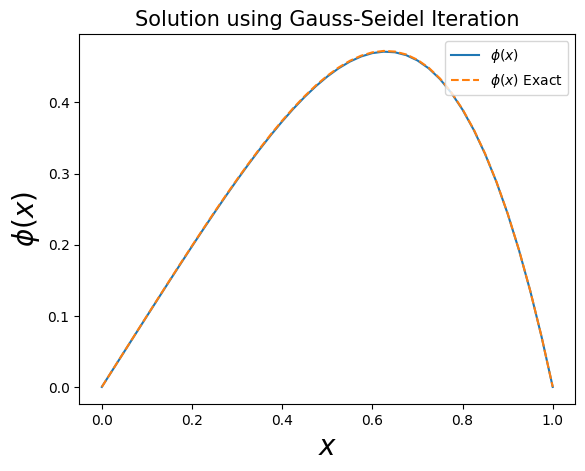

In [101]:
# Plot the solution: 
import matplotlib.pyplot as plt # import matplotlib, a conventional module name is plt
import numpy as np

fig, ax = plt.subplots() # create the elements required for matplotlib. This creates a figure containing a single axes.

# set the labels and titles:
ax.set_xlabel(r'$x$', fontsize=20) # set the x label
ax.set_ylabel(r'$\phi(x)$', fontsize=20) # set the y label. Note that the 'r' is necessary to remove the need for double slashes. You can use LaTeX! 
ax.set_title('Solution using Gauss-Seidel Iteration', fontsize=15) # set the title 

# make a one-dimensional plot using the above arrays, add a custom label
ax.plot(x, phiFinal, label=r'$\phi(x)$') 
ax.plot(x, phiSol, label=r'$\phi(x)$ Exact', ls='--') 

# construct the legend:
ax.legend(loc='upper right')  # Add a legend

plt.show() # show the plot here

Now let's plot the evolution of energy against iteration:

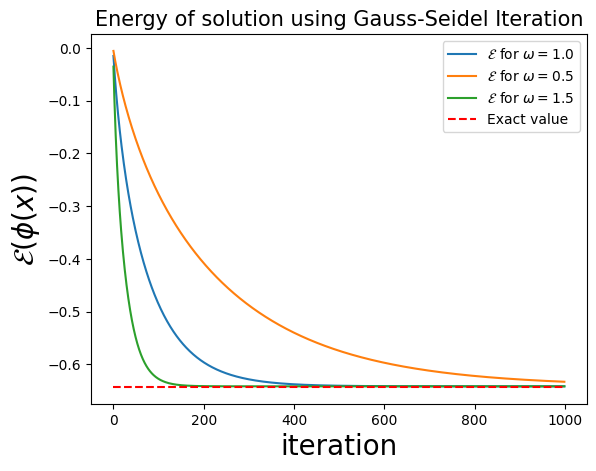

In [102]:
# Plot the solution: 
import matplotlib.pyplot as plt # import matplotlib, a conventional module name is plt
import numpy as np

fig, ax = plt.subplots() # create the elements required for matplotlib. This creates a figure containing a single axes.

# set the labels and titles:
ax.set_xlabel(r'iteration', fontsize=20) # set the x label
ax.set_ylabel(r'$\mathcal{E}(\phi(x))$', fontsize=20) # set the y label. Note that the 'r' is necessary to remove the need for double slashes. You can use LaTeX! 
ax.set_title('Energy of solution using Gauss-Seidel Iteration', fontsize=15) # set the title 

# make a one-dimensional plot using the above arrays, add a custom label
xiter = range(niter)
ax.plot(xiter,EnergyIter, label=r'$\mathcal{E}$ for $\omega=1.0$') 
ax.plot(xiter,EnergyIter05, label=r'$\mathcal{E}$ for $\omega=0.5$') 
ax.plot(xiter,EnergyIter15, label=r'$\mathcal{E}$ for $\omega=1.5$') 


ax.hlines(y=-9/14, xmin=xiter[0], xmax=xiter[-1], ls='--', label='Exact value', color='red')

# construct the legend:
ax.legend(loc='upper right')  # Add a legend

plt.show() # show the plot here